In [1]:
#1
import numpy as np

# 生成斐波拉契数列
def fib_g(max):
    n, a, b = 0, 0, 1
    while n < max:
        if a>0 :
            yield a/b
        else:
            pass
        a, b = b, a + b
        n = n + 1
    return 'done'

np.array(list(fib_g(7)))

array([ 1.        ,  0.5       ,  0.66666667,  0.6       ,  0.625     ,
        0.61538462])

In [2]:
#2.1
from datetime import datetime
import pandas as pd

symbol=['600036.XSHG','600050.XSHG','601318.XSHG']
data_dict = {}
for s in symbol:
    data_dict[s] =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
PN = pd.Panel(data_dict)
print(PN)

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 215 (major_axis) x 5 (minor_axis)
Items axis: 600036.XSHG to 601318.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: close to volume


In [3]:
#2.2
ARR=np.array(PN, ndmin=3)
print(ARR.shape)
ARR[:,-20:,0]

(3, 215, 5)


array([[ 106.22,  106.94,  105.94,  112.13,  110.89,  108.14,  107.34,
         107.78,  107.98,  106.18,  107.86,  108.1 ,  108.02,  108.02,
         110.41,  111.81,  111.25,  112.13,  117.24,  121.82],
       [   8.53,    8.56,    8.62,    8.88,    9.25,    9.24,    9.43,
           9.25,    9.02,    9.15,    9.63,    9.5 ,    9.9 ,    9.97,
           9.96,    9.49,    9.68,    9.61,    9.63,    9.8 ],
       [ 134.83,  134.56,  137.5 ,  143.18,  143.48,  144.15,  143.61,
         143.65,  144.35,  143.36,  146.41,  144.71,  148.56,  156.53,
         157.12,  157.72,  154.99,  163.52,  168.58,  169.57]])

In [4]:
#2.3
#diff = np.ediff1d(np.log(ARR[:,-21:,0]))
#print(diff)
diff = np.log(ARR[:,-20:,0])-np.log(ARR[:,-21:-1,0])
print(type(diff))
diff

<class 'numpy.ndarray'>


array([[ 0.00452916,  0.00675551, -0.00939503,  0.05678602, -0.01112019,
        -0.02511204, -0.00742532,  0.00409075,  0.00185391, -0.01681026,
         0.01569832,  0.00222263, -0.00074033,  0.        ,  0.02188431,
         0.01260029, -0.00502108,  0.00787899,  0.0445642 ,  0.03832143],
       [-0.00933496,  0.00351083,  0.00698489,  0.02971647,  0.04082199,
        -0.00108167,  0.02035421, -0.01927255, -0.02517922,  0.01430955,
         0.05112935, -0.01359143,  0.04124296,  0.00704583, -0.00100351,
        -0.04833846,  0.01982329, -0.00725768,  0.002079  ,  0.01749916],
       [ 0.00535437, -0.00200453,  0.02161372,  0.04047866,  0.00209307,
         0.00465877, -0.00375313,  0.00027849,  0.00486112, -0.00688196,
         0.02105196, -0.01167917,  0.02625718,  0.05225877,  0.00376216,
         0.00381146, -0.01746071,  0.05357471,  0.03047511,  0.00585541]])

In [5]:
#2.4
#diff.cumsum()
#[diff[i].cumsum() for i in range(diff.shape[0])]
np.array([diff[i].cumsum() for i in range(diff.shape[0])])

array([[ 0.00452916,  0.01128468,  0.00188965,  0.05867566,  0.04755547,
         0.02244343,  0.01501812,  0.01910886,  0.02096277,  0.00415252,
         0.01985084,  0.02207347,  0.02133314,  0.02133314,  0.04321746,
         0.05581775,  0.05079667,  0.05867566,  0.10323987,  0.14156129],
       [-0.00933496, -0.00582413,  0.00116077,  0.03087724,  0.07169923,
         0.07061757,  0.09097178,  0.07169923,  0.04652002,  0.06082956,
         0.11195891,  0.09836748,  0.13961044,  0.14665627,  0.14565275,
         0.09731429,  0.11713758,  0.1098799 ,  0.11195891,  0.12945807],
       [ 0.00535437,  0.00334984,  0.02496356,  0.06544222,  0.06753529,
         0.07219407,  0.06844093,  0.06871943,  0.07358055,  0.06669859,
         0.08775055,  0.07607138,  0.10232856,  0.15458733,  0.15834949,
         0.16216095,  0.14470024,  0.19827495,  0.22875006,  0.23460546]])

In [6]:
#3.1
diff_3=PN.minor_xs('close').pct_change(3)[3:]
diff_3.head()

,600036.XSHG,600050.XSHG,601318.XSHG
datetime,,,
2017-01-06 15:00:00,0.000577,0.031146,-0.006384
2017-01-09 15:00:00,-0.002737,0.036748,-0.006135
2017-01-10 15:00:00,-0.008876,-0.036920,-0.013997
2017-01-11 15:00:00,-0.001154,-0.100324,-0.006047
2017-01-12 15:00:00,0.003322,-0.134264,-0.007055


In [7]:
#3.2
#diff_1=PN.minor_xs('close').pct_change()[1:]
cov_5=diff_3.rolling(window=5).cov().fillna(method='ffill')
cov_5.tail(6)

600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                              
2017-11-17 15:00:00 600036.XSHG     0.000163     0.000040     0.000060
                    600050.XSHG     0.000040     0.001499     0.000892
                    601318.XSHG     0.000060     0.000892     0.001359
2017-11-20 15:00:00 600036.XSHG     0.000926     0.000636     0.000833
                    600050.XSHG     0.000636     0.000734     0.000623
                    601318.XSHG     0.000833     0.000623     0.001524

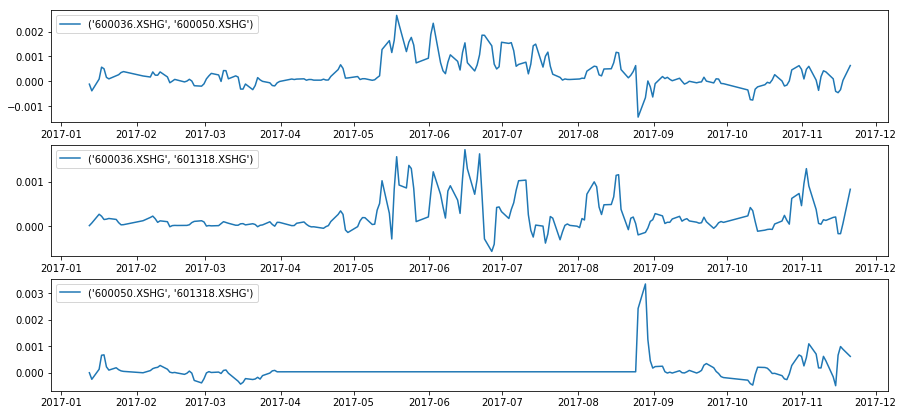

In [8]:
#3.3
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.subplot(3,1,1)
plt.plot(cov_5.unstack()[symbol[0],symbol[1]],label=(symbol[0],symbol[1]))
plt.legend(loc=2)

plt.subplot(3,1,2)
plt.plot(cov_5.unstack()[symbol[0],symbol[2]],label=(symbol[0],symbol[2]))
plt.legend(loc=2)

plt.subplot(3,1,3)
plt.plot(cov_5.unstack()[symbol[1],symbol[2]],label=(symbol[1],symbol[2]))
plt.legend(loc=2)
plt.show()

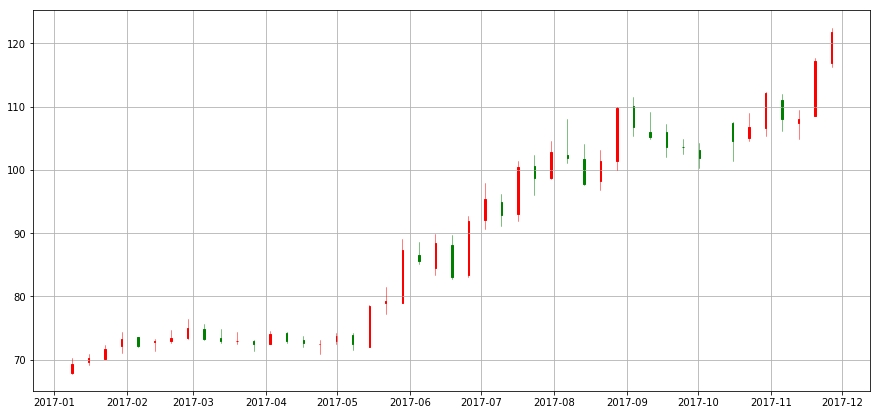

In [9]:
#4
from matplotlib.pylab import date2num
import matplotlib.finance as mpf
from datetime import timedelta

stock = data_dict['600036.XSHG']
stock_w=stock.resample('W').agg({'high':'max','low':'min', 'close':'last', 'open':'first'})
stock_w.index = list(map(lambda x: x+timedelta(hours=15), stock_w.index))
#print(stock_w.head())
stock_w['time'] = list(map(date2num, stock_w.index))
#print(stock_w.head())
candle = stock_w.reindex_axis(["time", "open", "high", "low", "close"], 1).values
#print(candle)

fig,ax = plt.subplots(figsize=(15,7))
#fig.subplots_adjust(bottom=0)
ax.grid(True)
mpf.candlestick_ohlc(ax, candle, width=0.6, colorup='r', colordown='g',alpha=1.0)
ax.xaxis_date()
plt.show()

In [10]:
#5
import talib as ta

#def EMA(price,n):
#    a = 2/(n+1)
#    result = price.ewm(alpha=a, adjust=False).mean
#    print(result)
#    return result

#print(type(stock.close))

EMA_10 = stock.close.ewm(alpha=2/11, adjust=False).mean()
print(EMA_10.tail())
print(type(EMA_10))

EMA_t = pd.Series(ta.EMA(np.array(stock.close.values, dtype=np.float64),10))
print(EMA_t.tail())
print(type(EMA_t))

DEMA_10 = 2*EMA_10 - EMA_10.ewm(alpha=2/11, adjust=False).mean()
print(DEMA_10.tail())
print(type(DEMA_10))

DEMA_t = 2*EMA_t - pd.Series(ta.EMA(np.array(EMA_t.values, dtype=np.float64),10))
print(DEMA_t.tail())
print(type(DEMA_t))

datetime
2017-11-14 15:00:00    108.924535
2017-11-15 15:00:00    109.347347
2017-11-16 15:00:00    109.853284
2017-11-17 15:00:00    111.196323
2017-11-20 15:00:00    113.127901
Name: close, dtype: float64
<class 'pandas.core.series.Series'>
210    108.924535
211    109.347347
212    109.853284
213    111.196323
214    113.127901
dtype: float64
<class 'pandas.core.series.Series'>
datetime
2017-11-14 15:00:00    109.962034
2017-11-15 15:00:00    110.542147
2017-11-16 15:00:00    111.244796
2017-11-17 15:00:00    113.433683
2017-11-20 15:00:00    116.538850
Name: close, dtype: float64
<class 'pandas.core.series.Series'>
210    109.962034
211    110.542147
212    111.244796
213    113.433683
214    116.538850
dtype: float64
<class 'pandas.core.series.Series'>


In [11]:
#6 
import portfolioopt as opt

pct_1 = PN.minor_xs('close').pct_change()[1:]
exp_rets = pct_1.mean()*252
cov_mat = pct_1.cov()*252
print (exp_rets)
print (cov_mat)

600036.XSHG    0.695874
600050.XSHG    0.270893
601318.XSHG    0.918358
dtype: float64
             600036.XSHG  600050.XSHG  601318.XSHG
600036.XSHG     0.063026     0.006673     0.034142
600050.XSHG     0.006673     0.180320     0.017325
601318.XSHG     0.034142     0.017325     0.062236


In [12]:
portfolio_tp = opt.tangency_portfolio(cov_mat, exp_rets, allow_short=False)
portfolio_tp

600036.XSHG    0.258217
600050.XSHG    0.009330
601318.XSHG    0.732453
dtype: float64